In [1]:
%matplotlib inline
import pandas as pd
import os
os.chdir('/Users/michaelcaruana/Desktop/pycon-pandas-tutorial')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Fuera de la ley,1937
1,Element,2016
2,Jeomjaengyideul,2012
3,An kubo sa kawayanan,2015
4,Hirer Angti,1992


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [23]:
dc = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
dc = dc.groupby(['year','character']).size()
dc = dc.unstack()
dc = dc.fillna(0)
dc.tail()

character,Batman,Superman
year,,
2014,4,1
2015,3,1
2016,11,2
2017,2,3
2019,1,1


In [22]:
dc.superman_years = dc.Superman > dc.Batman
superman_years = dc[dc.superman_years == True]
superman_years.shape

(13, 2)

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [21]:
dc.batman_years = dc.Batman > dc.Superman
batman_years = dc[dc.batman_years == True]
batman_years.shape

(23, 2)

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

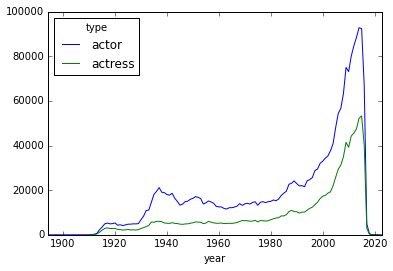

In [27]:
roles = cast.groupby(['year', 'type']).size()
roles = roles.unstack('type')
roles.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

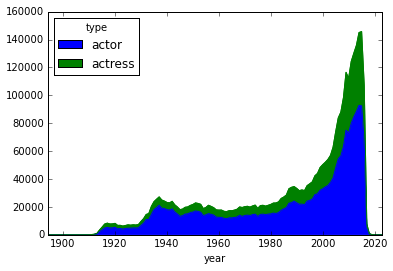

In [28]:
roles = cast.groupby(['year', 'type']).size()
roles = roles.unstack('type')
roles.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

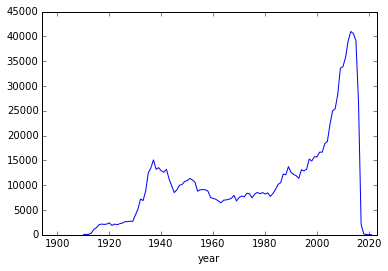

In [31]:
(roles.actor - roles.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

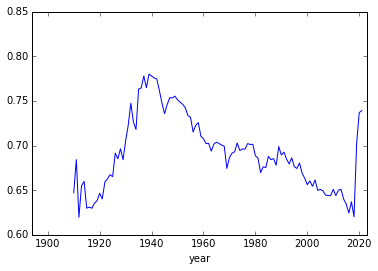

In [35]:
(roles.actor/(roles.actor + roles.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

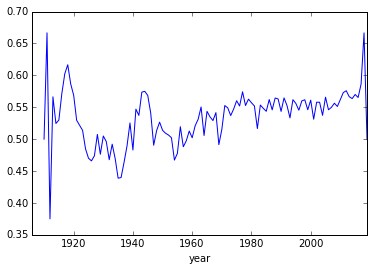

In [38]:
support = cast[cast.n == 2]
support = support.groupby(['year', 'type']).size()
support = support.unstack('type')
(support.actor/(support.actor + support.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

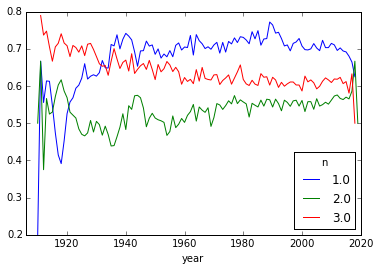

In [41]:
final = cast[cast.n <= 3]
final = final.groupby(['year', 'type','n']).size()
final = final.unstack('type')
final_plot = (final.actor/(final.actor + final.actress))
final_plot = final_plot.unstack('n')
final_plot.plot()